## Machine Learnig Model

## Linear Regression model 

Assumptions of a linear regression
1. Linearity
2. Homoscedasticity
3. Multivarieate normality
4. Independence of errors
5. Lack of multicollinearity

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


from statsmodels.formula.api import ols
from statsmodels.api import OLS

In [2]:
#load the dataset into dataframe
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [3]:
#change the categorical into numerical variable
df['Gender'].replace('Female', 1, inplace = True) 
df['Gender'].replace('Male', 2, inplace = True) 

change the gender categorical variable into numerical female:1 and male:2

# Treat outliers  

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


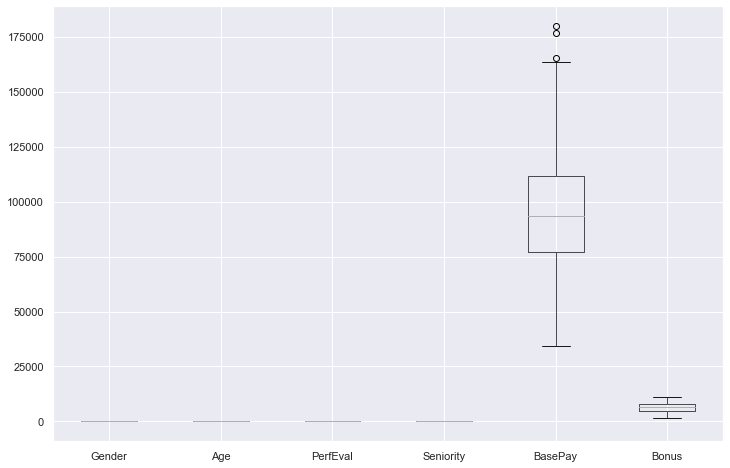

In [4]:
fig = plt.figure(figsize =(12,8))
df.boxplot()
fig.show()

In [5]:
IQR_BasePay = df['BasePay'].quantile(0.75)-df['BasePay'].quantile(0.25)
#To get the upper outliers
upper_outlier = df['BasePay'].quantile(0.75)+1.6*IQR_BasePay
#To get the lower outliers
lower_outlier = df['BasePay'].quantile(0.25)-1.6*IQR_BasePay
#To get the outlier
outliers = df[(df['BasePay']>upper_outlier)]

## Drop the outliers

In [6]:
df.drop(outliers.index, inplace = True)

In [7]:
#add total column
df['Total'] = df['BasePay'] + df['Bonus']

In [8]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Total
0,Graphic Designer,1,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,2,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,1,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,2,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,2,26,5,Masters,Engineering,5,99464,9319,108783


In [9]:
df.shape

(998, 10)

After removing the two outlier our data have 998 rows

## Our Objective is to predict the BasePay(Salary) and to know which feature influence the salary of a person

In [10]:
#get all the absolute correlation between basepay and other columns  
df.corr().BasePay.abs().sort_values()

PerfEval     0.051632
Bonus        0.127789
Gender       0.163493
Seniority    0.510169
Age          0.561743
Total        0.996807
BasePay      1.000000
Name: BasePay, dtype: float64

## Build a ols model (including all the numerical features) 

In [11]:
#define the ols object
model = ols('BasePay ~ Age + Seniority + Gender' , data = df ) 

In [12]:
#Calculation 
model_fit = model.fit()

In [13]:
#Print the result
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     561.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          2.06e-213
Time:                        23:40:50   Log-Likelihood:                -11031.
No. Observations:                 998   AIC:                         2.207e+04
Df Residuals:                     994   BIC:                         2.209e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8654.4300   2405.039      3.598      0.000    3934.894    1.34e+04
Age         1019.3129     33.944     30.029      0.000     952.702    1085.923
Seniority   9535.6448    347.782     27.418      0.000    8853.173    1.02e+04
Gender      9922.3027    971.582     10.213      0.000    8015.715    1.18e+04
==============================================================================
Omnibus:                       24.910   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.116
Skew:                           0.389   Prob(JB):                     2.13e-06
Kurtosis:                       3.151   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the result of our ols model, that the performance is not very good and there is differnce between the r squered measure and adjusted r squared measure which shows that there is some columns which are not very usefull for prediction but there is no warning for multicollinearit thats good

In [14]:
y_pred = model_fit.predict()

In [15]:
df['prediction'] = y_pred

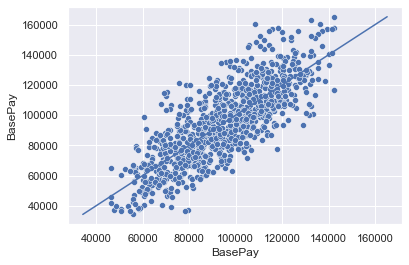

In [16]:
sns.scatterplot(data = df, x = y_pred , y = 'BasePay')
sns.lineplot(data = df, x = 'BasePay', y = 'BasePay')

The prediction is not perfect

In [17]:
model_fit.resid.mean()

1.4435266609301787e-12

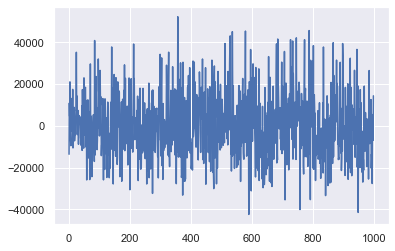

In [18]:
model_fit.resid.plot()

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


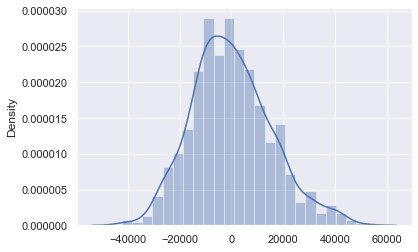

In [19]:
sns.distplot(model_fit.resid)

As we can see in the plot that it is not perfectly linear distribution

In [20]:
df = df.drop(['prediction', 'Total'], axis = 1).copy()

## Now we will include more columns because all the numerical columns are not enough to predict, need to include categorical columns also

In [21]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,1,18,5,College,Operations,2,42363,9938
1,Software Engineer,2,21,5,College,Management,5,108476,11128
2,Warehouse Associate,1,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,2,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,2,26,5,Masters,Engineering,5,99464,9319


In [22]:
#define the ols object
model = OLS(df.BasePay, df._get_numeric_data().drop('BasePay', axis = 1))

In [23]:
model_fit = model.fit()

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                BasePay   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              8083.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:40:53   Log-Likelihood:                         -11020.
No. Observations:                 998   AIC:                                  2.205e+04
Df Residuals:                     993   BIC:                                  2.207e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender      1.016e+04    856.491     11.863      0.000    8480.116    1.18e+04
Age         1138.0043     28.436     40.021      0.000    1082.204    1193.805
PerfEval   -3768.5322    735.541     -5.123      0.000   -5211.925   -2325.139
Seniority   8579.8620    403.857     21.245      0.000    7787.351    9372.373
Bonus          2.7444      0.469      5.849      0.000       1.824       3.665
==============================================================================
Omnibus:                       20.492   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.211
Skew:                           0.352   Prob(JB):                     2.48e-05
Kurtosis:                       3.125   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model perform well but we have problem of multicollinearity but the p values is always zero 

In [25]:
y_pred = model_fit.predict()

In [26]:
df['prediction'] = y_pred

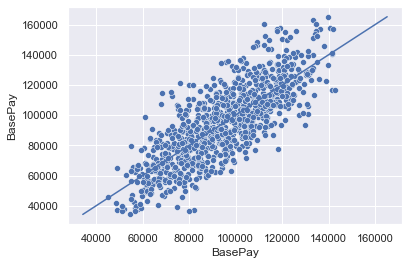

In [27]:
sns.scatterplot(data = df, x = y_pred , y = 'BasePay')
sns.lineplot(data = df, x = 'BasePay', y = 'BasePay')

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


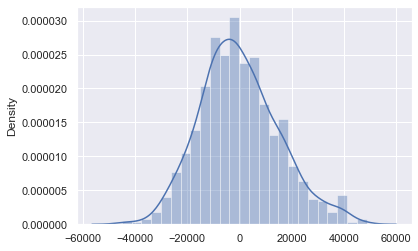

In [28]:
model_fit.resid.mean()
sns.distplot(model_fit.resid)

# Now I will use all the categorical columns also 

In [29]:
df.Education.unique()

array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

In [30]:
#for job title i will convert it into numerical manually because making dummies of education level dont make sense
dct = {'College' :15 , 'PhD' :20 , 'Masters' : 17 , 'High School' : 11}

In [31]:
df['Education'] = df['Education'].map(dct)

In [32]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,prediction
0,Graphic Designer,1,18,5,15,Operations,2,42363,9938,56235.368078
1,Software Engineer,2,21,5,15,Management,5,108476,11128,98815.601980
2,Warehouse Associate,1,19,4,20,Administration,5,90208,9268,85042.774469
3,Software Engineer,2,20,5,17,Sales,4,108080,10154,86424.736701
4,Graphic Designer,2,26,5,17,Engineering,5,99464,9319,99541.090188


Now there is two columns are categorical hence I will create dummies of these two 

In [33]:
dummies = pd.get_dummies(data = df,columns =  ['JobTitle','Dept'], drop_first = True)

In [34]:
dummies = dummies.drop('prediction', axis = 1).copy()

In [39]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender                        998 non-null    int64
 1   Age                           998 non-null    int64
 2   PerfEval                      998 non-null    int64
 3   Education                     998 non-null    int64
 4   Seniority                     998 non-null    int64
 5   BasePay                       998 non-null    int64
 6   Bonus                         998 non-null    int64
 7   JobTitle_Driver               998 non-null    uint8
 8   JobTitle_Financial Analyst    998 non-null    uint8
 9   JobTitle_Graphic Designer     998 non-null    uint8
 10  JobTitle_IT                   998 non-null    uint8
 11  JobTitle_Manager              998 non-null    uint8
 12  JobTitle_Marketing Associate  998 non-null    uint8
 13  JobTitle_Sales Associate      998 n

As we can see there is no categorical data, everything is numerical

In [40]:
from statsmodels.api import add_constant

In [51]:
dummies = add_constant(dummies)  #add the constant to our new dataframe where dummies are included

In [52]:
model = OLS(df.BasePay,dummies.drop('BasePay', axis = 1))

In [53]:
model_fit2 = model.fit()

In [54]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     270.2
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:51:24   Log-Likelihood:                -10611.
No. Observations:                 998   AIC:                         2.126e+04
Df Residuals:                     978   BIC:                         2.136e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5494.5919   3654.518      1.504      0.133   -1677.007    1.27e+04
Gender                         906.3929    754.981      1.201      0.230    -575.176    2387.962
Age                           1003.9661     38.590     26.016      0.000     928.238    1079.695
PerfEval                      -180.3803    769.384     -0.234      0.815   -1690.213    1329.453
Education                      846.1939    100.296      8.437      0.000     649.374    1043.013
Seniority                     9547.4853    290.089     32.912      0.000    8978.217    1.01e+04
Bonus                            0.1235      0.618      0.200      0.842      -1.089       1.336
JobTitle_Driver              -3978.9245   1450.095     -2.744      0.006   -6824.579   -1133.270
JobTitle_Financial Analyst    3786.4886   1415.419      2.675      0.008    1008.881    6564.096
JobTitle_Graphic Designer    -2568.2060   1419.504     -1.809      0.071   -5353.830     217.418
JobTitle_IT                  -1990.2420   1440.767     -1.381      0.167   -4817.591     837.108
JobTitle_Manager              3.099e+04   1479.327     20.946      0.000    2.81e+04    3.39e+04
JobTitle_Marketing Associate -1.662e+04   1411.321    -11.774      0.000   -1.94e+04   -1.38e+04
JobTitle_Sales Associate       182.3700   1436.764      0.127      0.899   -2637.124    3001.864
JobTitle_Software Engineer     1.33e+04   1415.856      9.395      0.000    1.05e+04    1.61e+04
JobTitle_Warehouse Associate -1133.3902   1465.172     -0.774      0.439   -4008.632    1741.852
Dept_Engineering              3256.8226   1038.904      3.135      0.002    1218.085    5295.560
Dept_Management               2534.6677   1046.507      2.422      0.016     481.010    4588.325
Dept_Operations               -387.4639   1015.324     -0.382      0.703   -2379.928    1605.000
Dept_Sales                    6312.8271   1023.856      6.166      0.000    4303.620    8322.034
==============================================================================
Omnibus:                        4.056   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                4.113
Skew:                          -0.154   Prob(JB):                        0.128
Kurtosis:                       2.936   Cond. No.                     8.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model performed quite well and satisfy most of assumption but still the multicollinearity problem exist, now I will drop the column as we can see in this model the p value is high at some columns and also there is difference between r squared and adjusted r squared  

In [63]:
#I will drop all those columns which have greater than 0.5 p values
drop_columns = ['Gender','PerfEval','BasePay', 'Bonus','JobTitle_IT', 'JobTitle_Graphic Designer','JobTitle_Sales Associate', 'Dept_Operations','JobTitle_Warehouse Associate', 'JobTitle_Driver']
model_fit3 = OLS(df.BasePay,dummies.drop(drop_columns, axis = 1)).fit()
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BasePay   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     509.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:02:27   Log-Likelihood:                -10618.
No. Observations:                 998   AIC:                         2.126e+04
Df Residuals:                     987   BIC:                         2.131e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5622.6519   1976.251      2.845      0.005    1744.515    9500.789
Age                            996.7158     22.553     44.195      0.000     952.459    1040.972
Education                      845.4346     98.188      8.610      0.000     652.754    1038.115
Seniority                     9581.7407    231.590     41.374      0.000    9127.276       1e+04
JobTitle_Financial Analyst    5290.0153   1073.235      4.929      0.000    3183.931    7396.100
JobTitle_Manager               3.28e+04   1165.247     28.145      0.000    3.05e+04    3.51e+04
JobTitle_Marketing Associate -1.545e+04   1030.806    -14.993      0.000   -1.75e+04   -1.34e+04
JobTitle_Software Engineer    1.523e+04   1061.934     14.339      0.000    1.31e+04    1.73e+04
Dept_Engineering              3390.6256    893.453      3.795      0.000    1637.340    5143.911
Dept_Management               2720.6900    888.738      3.061      0.002     976.657    4464.722
Dept_Sales                    6395.9199    875.521      7.305      0.000    4677.823    8114.016
==============================================================================
Omnibus:                        3.865   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.938
Skew:                          -0.147   Prob(JB):                        0.140
Kurtosis:                       2.907   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, as we can see all the assumption are satisfied but in the result my model still have difference between r squared and adjusted r squeared because of the constant I have added so now the model is good 

In [66]:
y_pred = model_fit3.predict()

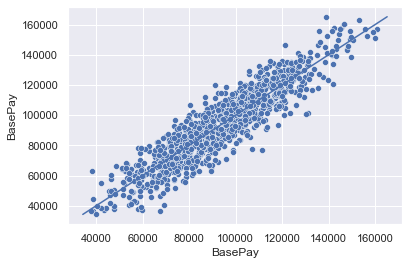

In [67]:
sns.scatterplot(data = dummies, x = y_pred , y = 'BasePay')
sns.lineplot(data = dummies, x = 'BasePay', y = 'BasePay')

As we can see the data points arre quite linear 

/Users/yadavvinamrata/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


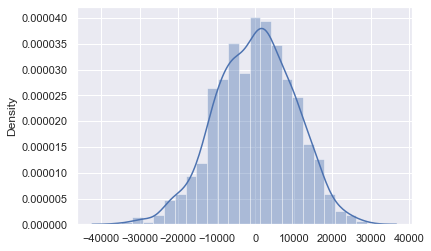

In [68]:
model_fit3.resid.mean()
sns.distplot(model_fit3.resid)